# Skaters (Season 2024/25) - Goals

### Step 0: Import libraries

In [1]:
import sys
import os
import pandas as pd

In [2]:
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [3]:
from utils import df_utils, distributions_utils, pmf_utils, cdf_utils, modeling_distributions_utils, pdf_utils

### Step 1: Import the dataset

In [4]:
#skaters_df = "https://moneypuck.com/moneypuck/playerData/seasonSummary/2024/regular/skaters.csv"
skaters_df = "../data/skaters.csv"
df = pd.read_csv(skaters_df)
df.head(5)

,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,...,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
0,8478047,2024,Michael Bunting,NSH,L,other,76,2237.0,37.0,26.19,...,7.28,10.09,72.0,87.0,0.00,0.00,0.0,0.0,0.0,0.0
1,8478047,2024,Michael Bunting,NSH,L,all,76,70819.0,1474.0,43.70,...,161.54,187.75,3221.0,3522.0,0.00,0.00,0.0,0.0,0.0,0.0
2,8478047,2024,Michael Bunting,NSH,L,5on5,76,59813.0,1294.0,43.70,...,112.73,122.08,2661.0,2707.0,0.71,1.71,19.0,43.0,16.0,31.0
3,8478047,2024,Michael Bunting,NSH,L,4on5,76,6.0,2.0,2.58,...,0.20,0.17,4.0,11.0,0.00,0.00,0.0,0.0,0.0,0.0
4,8478047,2024,Michael Bunting,NSH,L,5on4,76,8763.0,141.0,36.88,...,23.81,2.60,311.0,54.0,0.00,0.01,0.0,1.0,0.0,1.0


### Step 2: Read the data

In [5]:
df_utils.print_df_size(df)

Number of samples: 4600
Number of features: 154


In [6]:
df_utils.save_column_names(df)

Saved: names_columns.txt


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Columns: 154 entries, playerId to fenwickAgainstAfterShifts
dtypes: float64(147), int64(3), object(4)
memory usage: 5.4+ MB


### Step 3: Data cleaning

In [8]:
# Missing values?
df_utils.report_nan(df)

No missing values found.


In [9]:
df = df_utils.drop_duplicate_columns(df, ["faceoffsWon", "I_F_faceOffsWon"])
df = df_utils.drop_duplicate_columns(df, [ "penalityMinutes", "I_F_penalityMinutes"])

Dropped columns: ['I_F_faceOffsWon']
Number of features: 153
Dropped columns: ['I_F_penalityMinutes']
Number of features: 152


## Part 1 - Goals

### Step 4: Variables and Filter

In [10]:
feature="I_F_goals"
situation = "all"
min_games_played = 20
name_player="Auston Matthews"

In [11]:
df_goals = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]

### Step 5: Summary statistics and Frequency Tables

In [12]:
answer = df[df["situation"] == "all"].loc[lambda d: d[feature].idxmax()]
print(f"Top goal scorer: {answer["name"]} with {int(answer[feature])} goals.")

answer = df[df["situation"] == "5on4"].loc[lambda d: d['I_F_goals'].idxmax()]
print(f"Top goal scorer in 5-on-4 situations: {answer["name"]} with {int(answer[feature])} goals.")

answer = df[df["situation"] == "4on5"].loc[lambda d: d['I_F_goals'].idxmax()]
print(f"Top goal scorer in 4-on-5 situations: {answer["name"]} with {int(answer[feature])} goals.")

Top goal scorer: Leon Draisaitl with 52 goals.
Top goal scorer in 5-on-4 situations: Jake Guentzel with 15 goals.
Top goal scorer in 4-on-5 situations: Alex Tuch with 6 goals.


To focus on meaningful performance, this chart includes only skaters who played a minimum number of games.

Mean: 11.19
Variance: 99.17
Standard deviation: 9.95
Mode: 4.0


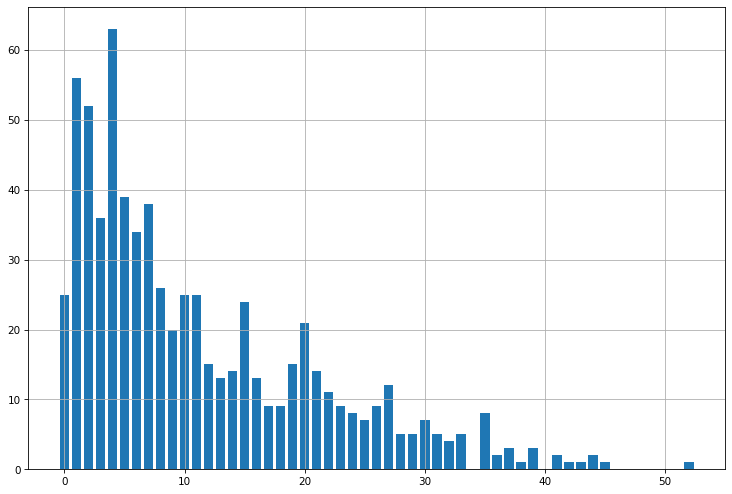

In [13]:
distributions_utils.plot_ftab(df_goals, feature, xlabel="Goals")

Cohen's effect size: 1.15


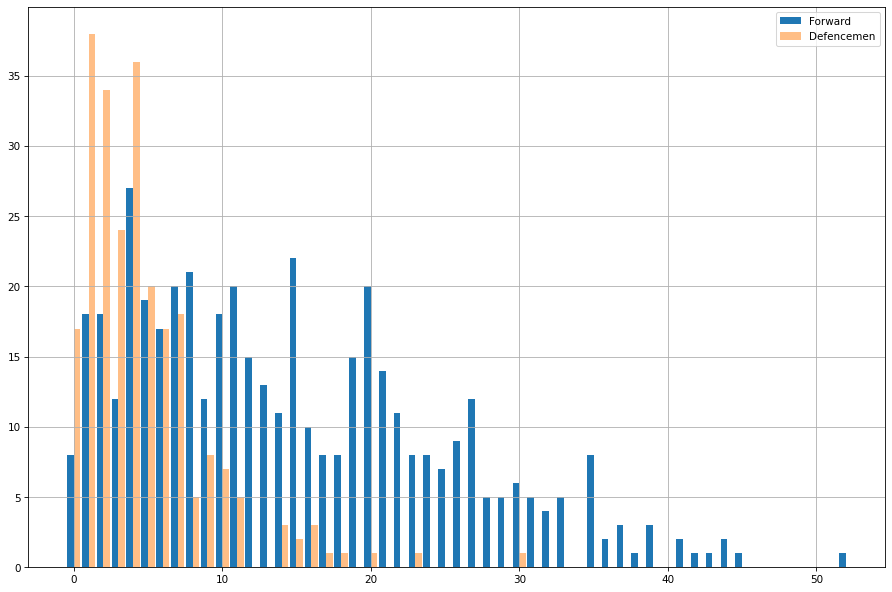

In [14]:
df1 = df_goals[df_goals["position"]!="D"]
df2 = df_goals[df_goals["position"]=="D"]

distributions_utils.plot_two_ftabs(df1, df2, feature, name1="Forward", name2="Defencemen")

### Step 6: Probability Mass Function

Actual PMF: 
Mean: 11.19
Variance: 99.03
Standard deviation: 9.95
Mode: 4.0
Skewness: 1.13

Observed PMF: 
Mean: 20.04
Variance: 120.32
Standard deviation: 10.97
Mode: 20.0
Skewness: 0.37


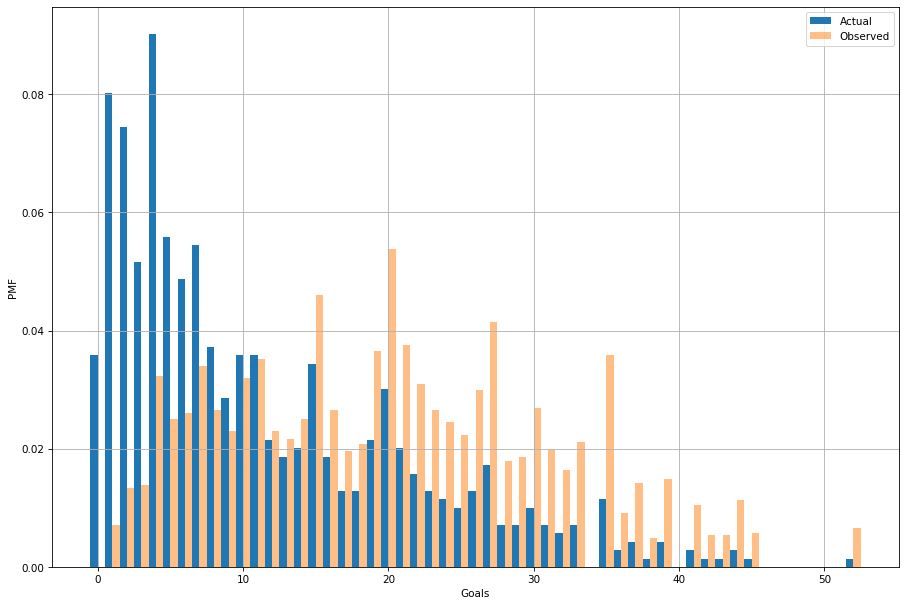

In [15]:
pmf_utils.plot_pmf(df_goals, feature, xlabel="Goals", width=0.5)

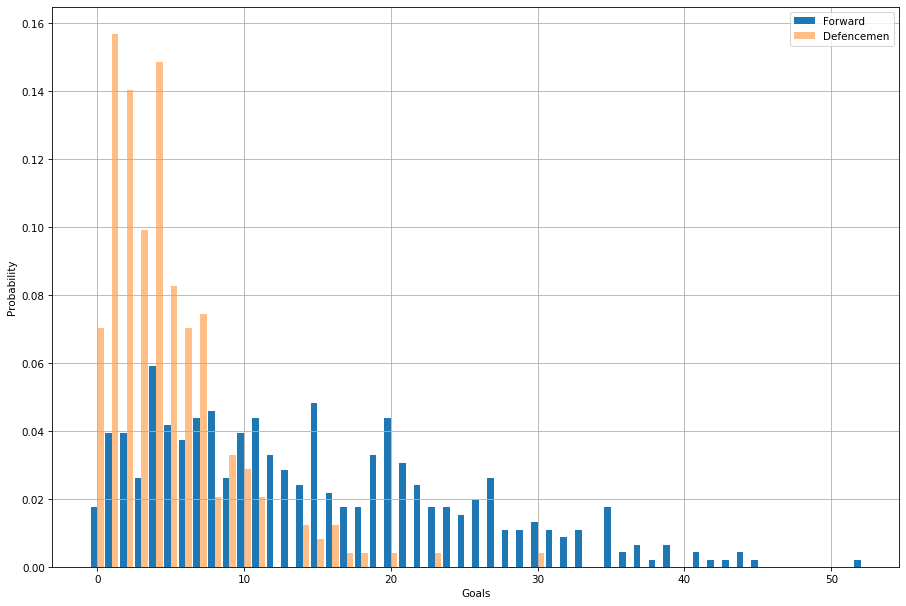

In [16]:
df1 = df_goals[df_goals["position"]!="D"]
df2 = df_goals[df_goals["position"]=="D"]

pmf_utils.plot_two_pmfs(df1, df2, feature, name1="Forward", name2="Defencemen", xlabel="Goals")

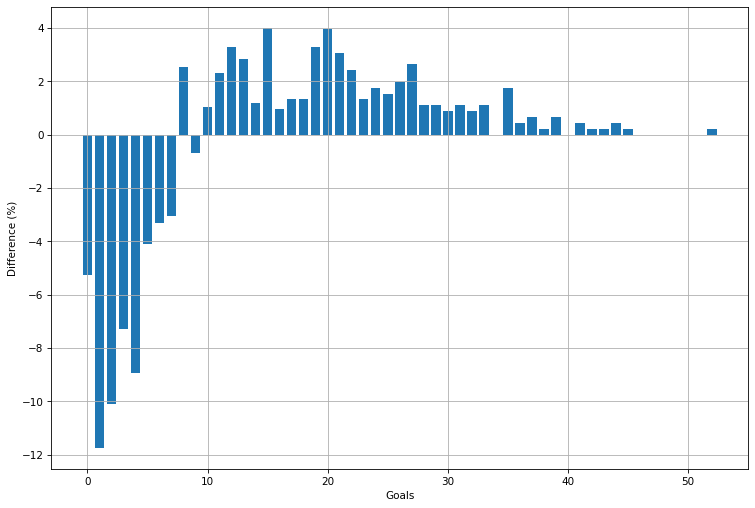

In [17]:
df1 = df_goals[df_goals["position"]!="D"]
df2 = df_goals[df_goals["position"]=="D"]

pmf_utils.plot_diff_pmfs(df1, df2, feature, name1="Forward", name2="Defencemen", xlabel="Goals")

### Step 7: Percentile Ranks and Cumulative Distribution Function

Reference player: **Auston Matthews**.

Auston Matthews - Percentile rank: 96.42
Median: 8.00
Interquartile range: 13.00
Quartile skewness: 0.38


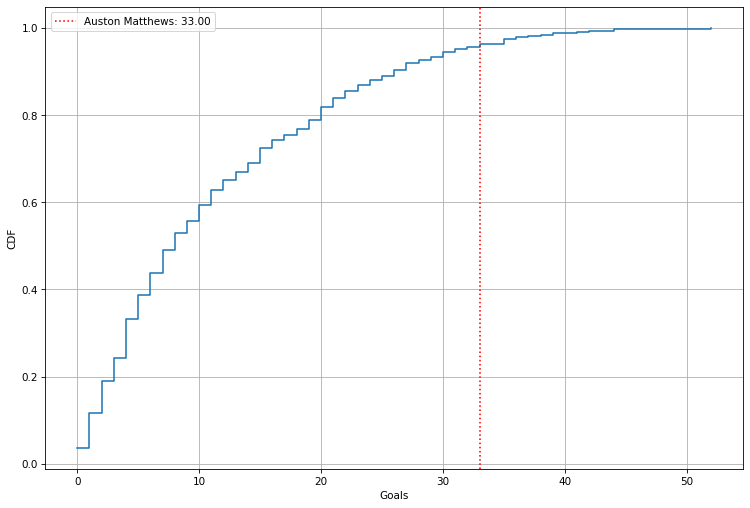

In [18]:
vals = df_goals[feature].values
ref = df_goals[df_goals["name"]==name_player][feature].values[0]

cdf_utils.percentile_rank(ref, vals, label=name_player)
cdf_utils.plot_cdf(ref, vals, label=name_player, xlabel="Goals")

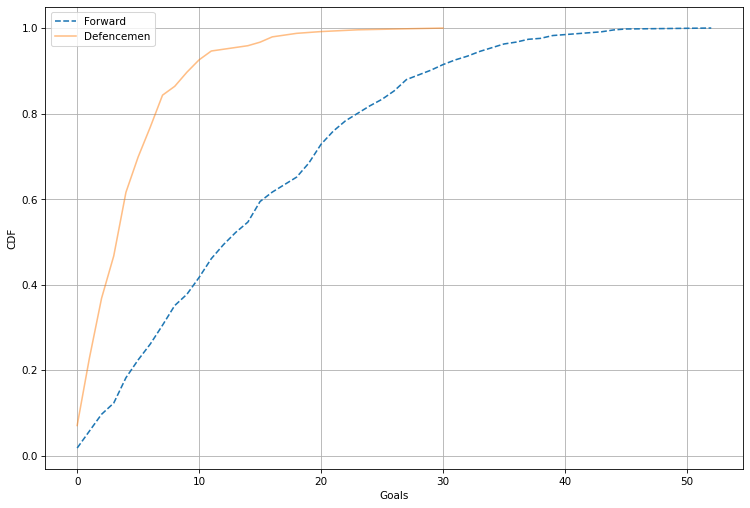

In [19]:
vals1 = df_goals[df_goals["position"]!="D"][feature].values
vals2 = df_goals[df_goals["position"]=="D"][feature].values

cdf_utils.plot_two_cdfs(vals1, vals2, name1="Forward", name2="Defencemen", xlabel="Goals")

### Step 8: Modeling Distributions

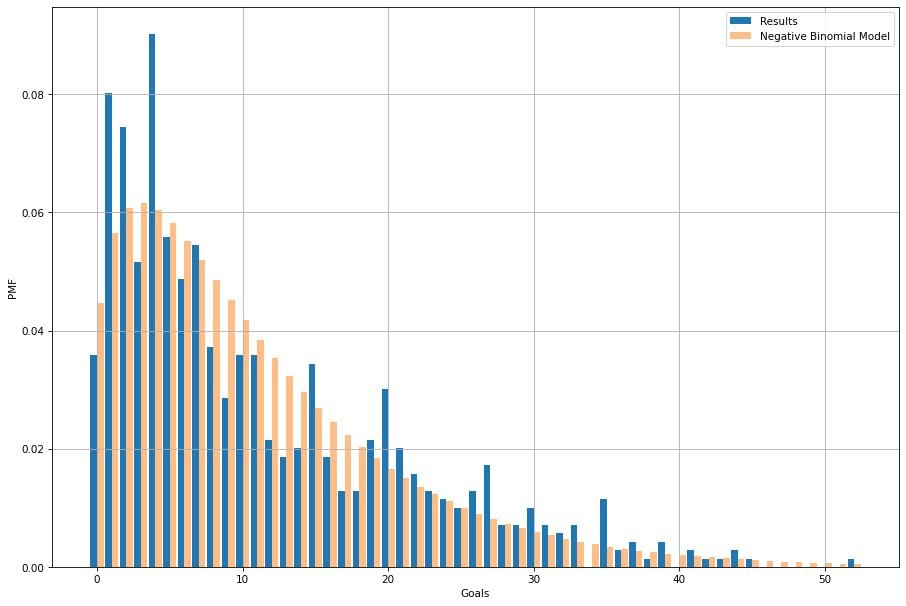

In [20]:
top_score = int(df_goals[feature].max())

modeling_distributions_utils.plot_negative_binomial(
    df_goals, 
    feature, 
    range(top_score+1),
    xlabel="Goals")

### Step 9: Probability Density Function and Kernel Density Estimate

## Part 2 - Goals per 60

### Step 4: Variables and Filter

In [21]:
situation = "all"
feature1 = "I_F_goals"
feature2 = "icetime"
feature = "goals_per_60"
min_games_played = 20
name_player="Auston Matthews"

A new feature with the goals per 60.

In [22]:
df_goals = df.copy()
df_goals[feature] = (df_goals[feature1] / df_goals[feature2]) * 3600

In [23]:
df_goals = df_goals[(df["situation"]==situation) & (df_goals["games_played"]>=min_games_played)]

### Step 5: Summary statistics and Frequency Tables

In [24]:
res = df_goals.loc[lambda d: d[feature].idxmax()]
print(f"Player with the highest rate: {res["name"]} with {res[feature]:.2f}.")

res = df_goals.loc[lambda d: d[feature].idxmin()]
print(f"Player with the lowest rate: {res["name"]} with {res[feature]:.2f}.")

print(f"Mean: {df_goals[feature].mean():.2f}")
print(f"Variance: {df_goals[feature].var():.2f}")
print(f"Standard deviation: {df_goals[feature].std():.2f}")

Player with the highest rate: Alex Ovechkin with 2.29.
Player with the lowest rate: Adam Pelech with 0.00.
Mean: 0.59
Variance: 0.18
Standard deviation: 0.42


### Step 6: Probability Mass Function

### Step 7: Percentile Ranks and Cumulative Distribution Function

Reference player: **Auston Matthews**.

Auston Matthews - Percentile rank: 96.99
Median: 0.53
Interquartile range: 0.66
Quartile skewness: 0.07


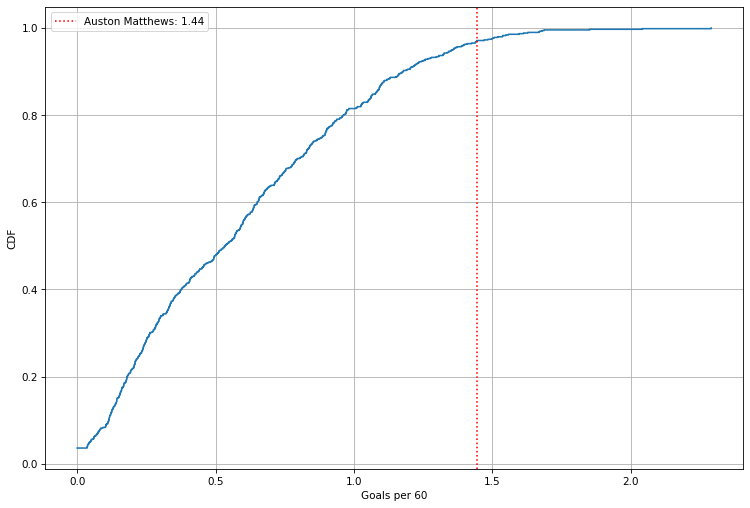

In [25]:
vals = df_goals[feature].values
ref = df_goals[df_goals["name"]==name_player][feature].values[0]

cdf_utils.percentile_rank(ref, vals, label=name_player)
cdf_utils.plot_cdf(ref, vals, label=name_player, xlabel="Goals per 60")

### Step 8: Modeling Distributions

### Step 9: Probability Density Function and Kernel Density Estimate

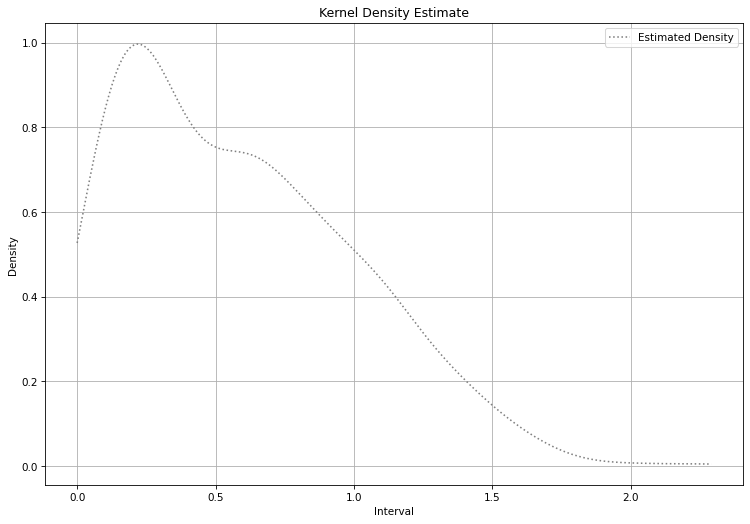

In [26]:
pdf_utils.plot_kde(df_goals, feature)